# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
image = cv2.imread('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg', cv2.IMREAD_GRAYSCALE)

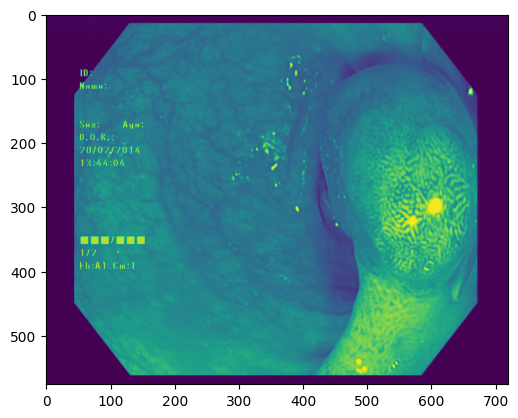

In [ ]:
plt.imshow(image)

In [ ]:
# This code performs the FFT on the image
# It has both Comples and real values
frequencies = np.fft.fft2(image)
print(frequencies)

[[37209304.              +0.j         -5295222.44932983+1444852.8857076j
  -7867847.28108798 +818411.14360919j ...
  -4883289.4485275 +1987056.57043355j -7867847.28108797 -818411.14360919j
  -5295222.44932983-1444852.8857076j ]
 [-3812473.69935776+2630125.28766552j -3028718.90214311 -754867.11613965j
    307003.95737943-1964972.14438387j ...
   1559398.80400821 -960068.66618717j   765970.3668257  -550851.01538901j
  -1644905.80253993 +807285.142232j  ]
 [-1654204.29308812+2027800.61400164j -1106876.81144387 -138622.20200768j
    318456.64812451 -813609.43995425j ...
    335815.95762151  -53379.58928393j  -152998.29475066 -799876.03690446j
    464486.81506783-1150848.63853814j]
 ...
 [-1886127.2602308  -816639.31090043j   230203.88075538  +65957.62993435j
    407448.04316727 +245485.85723458j ...
    490742.21711177 -166388.67064092j   798992.54632847 +495958.10676726j
    455703.48466243 +663813.34811732j]
 [-1654204.29308812-2027800.61400164j   464486.81506783+1150848.63853814j
   -15

In [ ]:
# The frequency shifted from 'zero_freq' to 'center freq'
frequencies_shifted = np.fft.fftshift(frequencies)
print(frequencies_shifted)

[[-6.42400000e+03+3.12638804e-13j  7.98112877e+01+1.07343918e+03j
   9.99491070e+02+6.00376161e+01j ...  1.50182092e+03+6.25525450e+02j
   9.99491070e+02-6.00376161e+01j  7.98112877e+01-1.07343918e+03j]
 [ 4.80403064e+02+4.97786121e+02j  5.00799911e+02+5.35330809e+02j
   1.70510132e+02-8.00080759e+02j ... -1.04940907e+03-5.85350804e+01j
  -4.76997286e+02-1.89429700e+02j  2.50241483e+02+1.25893233e+03j]
 [-1.46987554e+02-1.07326303e+03j  7.48798213e+01-1.22473563e+03j
  -1.33373114e+03+3.65892789e+01j ...  4.05881033e+02+4.33948142e+02j
   1.09127959e+03-6.00945626e+01j  4.29244119e+02-2.97701654e+02j]
 ...
 [ 4.95007880e+00-5.82593660e+02j -3.06144085e+02-3.03347116e+02j
  -3.75151933e+02+4.60221557e+02j ...  7.73156307e+02+7.23103843e+02j
  -4.18099725e+02+1.34848856e+02j -3.08901467e+02-1.05627546e+03j]
 [-1.46987554e+02+1.07326303e+03j  4.29244119e+02+2.97701654e+02j
   1.09127959e+03+6.00945626e+01j ... -2.56457709e+02-8.81070203e+02j
  -1.33373114e+03-3.65892789e+01j  7.48798213e+

In [ ]:
# Next I computing the Magnetic spectrum, (magnitude or amplitude of the frequencies)
# Taking the logerithm to enhance the visualizations

magnitude_spectrum = 20 * np.log(np.abs(frequencies_shifted))
print(magnitude_spectrum)

# From the above code, I analysed
# There is no complex values, it has only the real numbers

[[175.35592511 139.62758772 138.18094131 ... 147.88842335 138.18094131
  139.62758772]
 [130.7857475  131.94460063 134.1384262  ... 139.1507147  124.81467116
  143.14788606]
 [139.75500326 142.2469166  143.9222366  ... 127.74366112 139.93240346
  125.16775646]
 ...
 [127.35052114 121.32122903 127.72927465 ... 139.29419291 121.70401911
  140.07070947]
 [139.75500326 125.16775646 139.93240346 ... 136.4360092  143.9222366
  142.2469166 ]
 [130.7857475  143.14788606 124.81467116 ... 100.57036413 134.1384262
  131.94460063]]


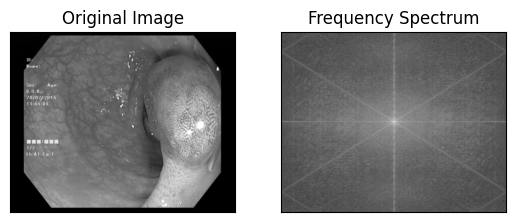

In [ ]:
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Frequency Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Visualizing the High Spatial Frequencies and Low Spatial Frequencies

In [ ]:
def magnetic_spectrum(image):
  image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)

  # Compute the frequency spectrum
  frequencies = np.fft.fft2(image)
  frequencies_shifted = np.fft.fftshift(frequencies)
  magnitude_spectrum = np.abs(frequencies_shifted)

  # Visualize the frequency spectrum
  plt.subplot(1, 3, 1)
  plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
  plt.title('Frequency Spectrum')
  plt.show()

  # Determine the center of the frequency spectrum
  rows, cols = image.shape
  center_row, center_col = rows // 2, cols // 2

  # Compute the distance from each frequency component to the center
  distances = np.zeros_like(magnitude_spectrum)
  for i in range(rows):
      for j in range(cols):
          distances[i, j] = np.sqrt((i - center_row)**2 + (j - center_col)**2)

  # Define a radius to separate high and low frequencies
  # Adjust this value according to the characteristics of your image
  radius = 50

  # Create masks to separate high and low spatial frequencies
  high_freq_mask = distances > radius
  low_freq_mask = distances <= radius

  # Visualize the high and low spatial frequency masks
  plt.figure(figsize=(8, 5))
  plt.subplot(1, 3, 2)
  plt.imshow(high_freq_mask, cmap='gray')
  plt.title('High Spatial Frequencies')
  plt.subplot(1, 3, 3)
  plt.imshow(low_freq_mask, cmap='gray')
  plt.title('Low Spatial Frequencies')
  plt.show()

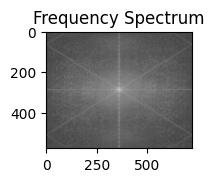

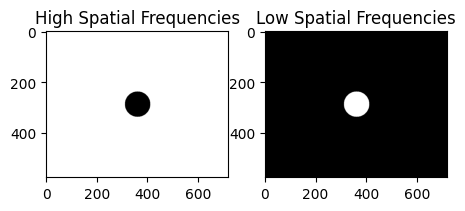

In [ ]:
magnetic_spectrum('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg')
# In High Frequency spectrum, we fing the lot of info and viceversa

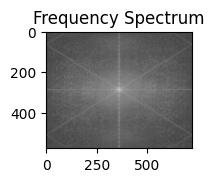

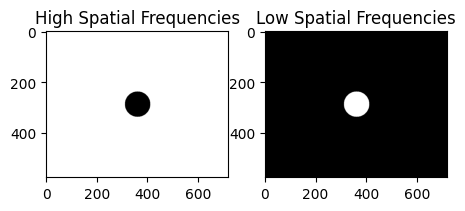

In [ ]:
magnetic_spectrum('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg')

### In Discrete Fourier Transform, used to figure out the High (contains high info) and Low spacial frequency of the images (contains low info).

I can apply the high pass filter and Low Pass filter.

# High Pass Filter

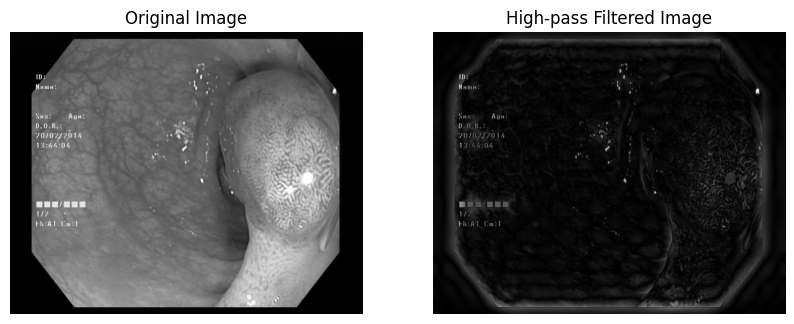

In [ ]:
# Appling the High-Pass Filter on the Image

import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg',cv2.IMREAD_GRAYSCALE)

# Compute the frequency spectrum
frequencies = np.fft.fft2(image)
frequencies_shifted = np.fft.fftshift(frequencies)

# Create a high-pass filter mask
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
radius = 10  # Adjust this value to control the radius of the high-pass filter
mask = np.ones_like(frequencies_shifted)
mask[center_row - radius:center_row + radius, center_col - radius:center_col + radius] = 0

# Apply the high-pass filter
filtered_frequencies = frequencies_shifted * mask

# Inverse transform the filtered frequency spectrum
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_frequencies))
filtered_image = np.abs(filtered_image).astype(np.uint8)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('High-pass Filtered Image')
plt.axis('off')
plt.show()


# Low Pass Filter

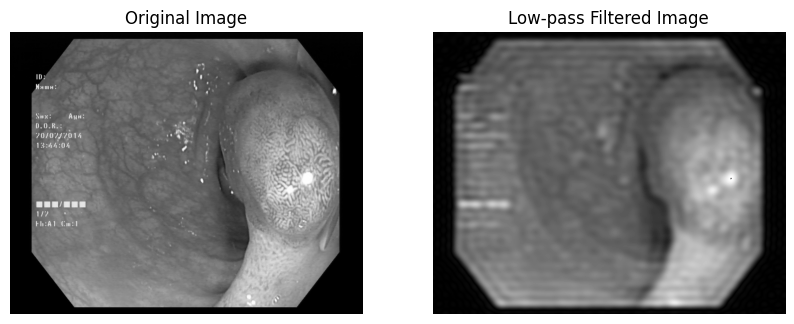

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the frequency spectrum
frequencies = np.fft.fft2(image)
frequencies_shifted = np.fft.fftshift(frequencies)

# Create a low-pass filter mask
rows, cols = image.shape
center_row, center_col = rows // 2, cols // 2
radius = 30  # Adjust this value to control the radius of the low-pass filter
mask = np.zeros_like(frequencies_shifted)
for u in range(rows):
    for v in range(cols):
        distance = np.sqrt((u - center_row)**2 + (v - center_col)**2)
        if distance <= radius:
            mask[u, v] = 1

# Apply the low-pass filter
filtered_frequencies = frequencies_shifted * mask

# Inverse transform the filtered frequency spectrum
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_frequencies))
filtered_image = np.abs(filtered_image).astype(np.uint8)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Low-pass Filtered Image')
plt.axis('off')
plt.show()


# Preprocessing

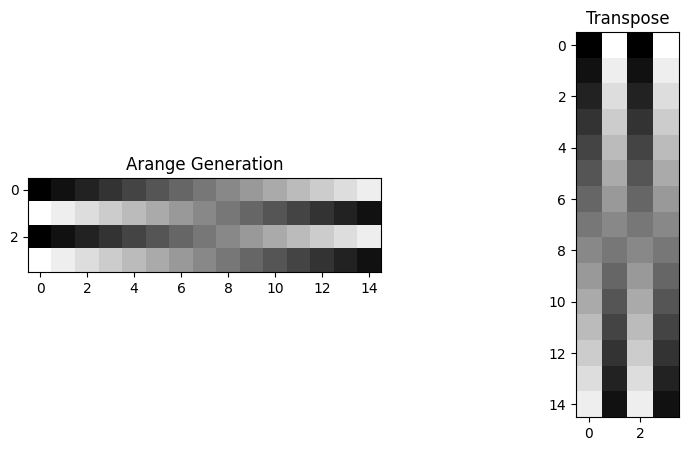

In [ ]:
array_spectrum = np.array([np.arange(0,255,17),
                           np.arange(255,0,-17),
                           np.arange(0,255,17),
                           np.arange(255,0,-17)])
fig, ax = plt.subplots(1,2,figsize=(10, 5))
ax[0].imshow(array_spectrum, cmap='gray')
ax[0].set_title("Arange Generation")
ax[1].imshow(array_spectrum.T, cmap='gray')
ax[1].set_title("Transpose")
plt.show()

# Computing Histograms on Images

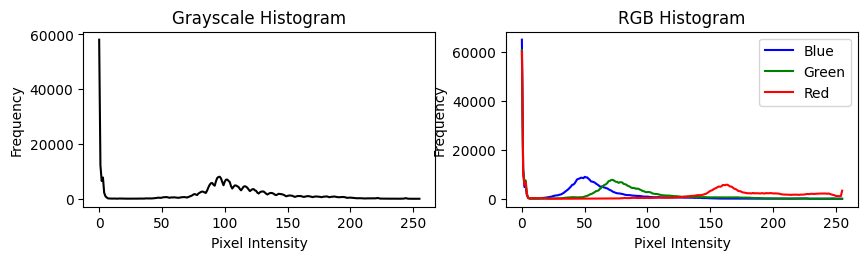

In [ ]:
# Load an image
img = cv2.imread('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg')

# Convert image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Compute histogram for grayscale image
hist_gray = cv2.calcHist([gray_img], [0], None, [256], [0,256])

# Compute histograms for color channels
b, g, r = cv2.split(img)
hist_b = cv2.calcHist([b], [0], None, [256], [0,256])
hist_g = cv2.calcHist([g], [0], None, [256], [0,256])
hist_r = cv2.calcHist([r], [0], None, [256], [0,256])

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(2, 2, 1)
plt.plot(hist_gray, color='k')
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.plot(hist_b, color='b')
plt.plot(hist_g, color='g')
plt.plot(hist_r, color='r')
plt.title('RGB Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend(['Blue', 'Green', 'Red'])

plt.show()

#  **Average Filters**

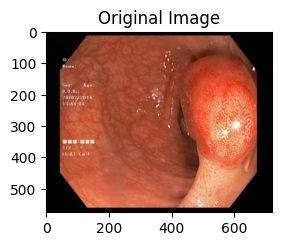

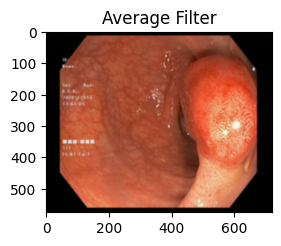

In [ ]:
image = cv2.imread('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg')

# Defining the kernal size
kernal_size = (5,5)

# Apply the average filter
average_filter = cv2.blur(image, kernal_size)

plt.subplot(1, 2, 1)
# Display the original and filtered image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

plt.subplot(1, 2, 2)
# Display the original and filtered image
plt.imshow(cv2.cvtColor(average_filter, cv2.COLOR_BGR2RGB))
plt.title('Average Filter')
plt.show()

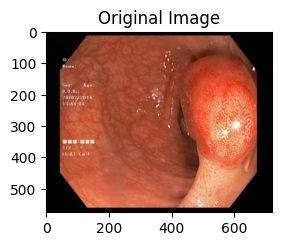

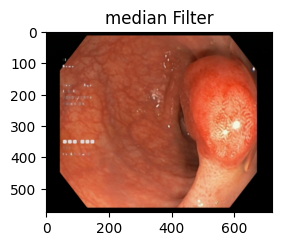

In [ ]:
image = cv2.imread('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg')

# Applying the kernal
kernal_size = 5

# Apply the average filter
median_filter = cv2.medianBlur(image, kernal_size)

plt.subplot(1, 2, 1)
# Display the original and filtered image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

plt.subplot(1, 2, 2)
# Display the original and filtered image
plt.imshow(cv2.cvtColor(median_filter, cv2.COLOR_BGR2RGB))
plt.title('median Filter')
plt.show()



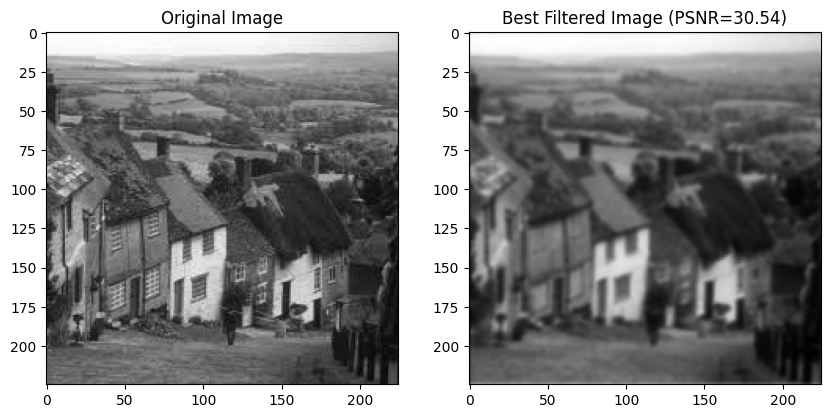

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

def homomorphic_filter(image, cutoff_freq, sigma):
    # Step 1: Convert image to logarithmic domain
    image_log = np.log1p(np.float64(image))

    # Step 2: Frequency domain transformation
    image_fft = np.fft.fft2(image_log)
    image_fft_shifted = np.fft.fftshift(image_fft)

    # Step 3: Design high-pass filter
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            mask[i, j] = (1 - np.exp(-((i - center_row)**2 + (j - center_col)**2) / (2 * sigma**2)))
    mask = 1 - mask
    mask[mask < cutoff_freq] = 0

    # Step 4: Filtering
    image_filtered_fft = image_fft_shifted * mask

    # Step 5: Inverse transformation
    image_filtered = np.fft.ifft2(np.fft.ifftshift(image_filtered_fft))
    image_filtered = np.exp(np.real(image_filtered)) - 1
    image_filtered = np.uint8(image_filtered)

    return image_filtered

def psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    if mse == 0:
        return float('inf')
    max_val = np.max(image1)
    return 20 * np.log10(max_val / np.sqrt(mse))

# Load image
image = cv2.imread('/content/images.jpg', cv2.IMREAD_GRAYSCALE)

# Define parameter grid for sigma and cutoff frequency
param_grid = {
    'sigma': [5, 10, 15, 20, 25, 30],
    'cutoff_freq': [0.1, 0.2, 0.3, 0.4, 0.5]
}

# Perform grid search
best_psnr = float('-inf')
best_params = None

for params in ParameterGrid(param_grid):
    sigma = params['sigma']
    cutoff_freq = params['cutoff_freq']

    # Apply homomorphic filtering
    filtered_image = homomorphic_filter(image, cutoff_freq, sigma)

    # Evaluate performance using PSNR
    score = psnr(image, filtered_image)

    # Update best parameters if current PSNR is better
    if score > best_psnr:
        best_psnr = score
        best_params = params
        best_filtered_image = filtered_image

# Display the best filtered image
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(best_filtered_image, cmap='gray')
plt.title('Best Filtered Image (PSNR={:.2f})'.format(best_psnr))
plt.show()


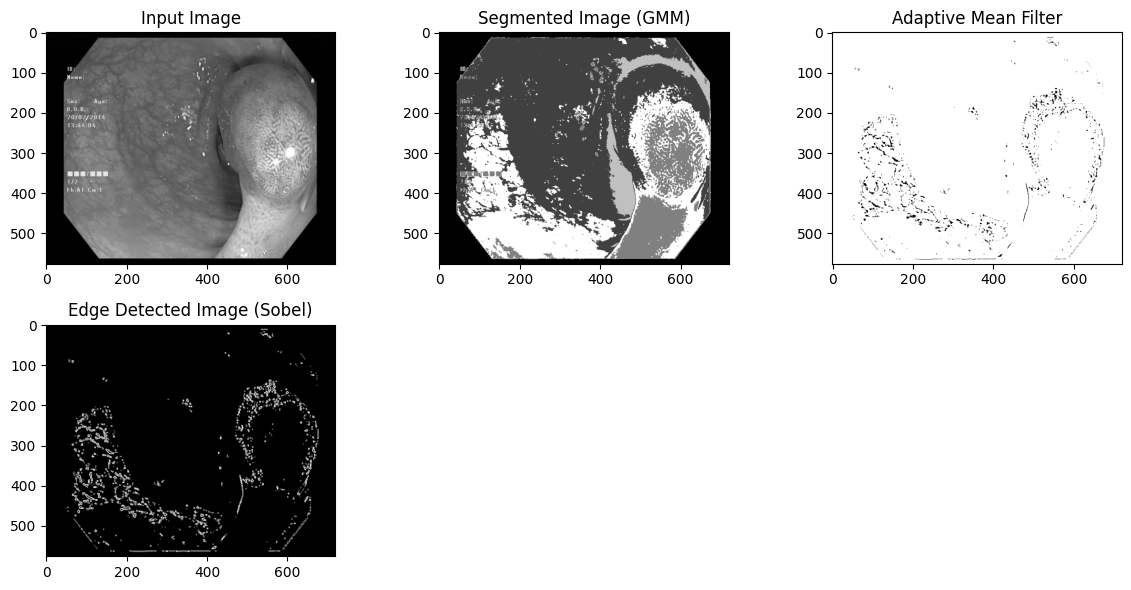

PSNR: 7.70 dB


In [ ]:
import cv2
import numpy as np
from sklearn.mixture import GaussianMixture
from skimage.filters import sobel
from sklearn.metrics import mean_squared_error
from math import log10
import matplotlib.pyplot as plt

def evaluate_image_processing(image_path, n_components=5):
    # Load the input image
    input_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(input_image.reshape(-1, 1))
    segmented_image = gmm.predict(input_image.reshape(-1, 1)).reshape(input_image.shape)

    # Convert segmented image to uint8
    segmented_image = np.uint8(segmented_image)

    # Apply Adaptive Mean Filter
    adaptive_mean = cv2.adaptiveThreshold(segmented_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Apply Sobel filter for edge detection
    edges = sobel(adaptive_mean)

    # Calculate PSNR
    psnr = 10 * log10((255**2) / mean_squared_error(input_image.flatten(), edges.flatten()))

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(input_image, cmap='gray')
    plt.title('Input Image')

    plt.subplot(2, 3, 2)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image (GMM)')

    plt.subplot(2, 3, 3)
    plt.imshow(adaptive_mean, cmap='gray')
    plt.title('Adaptive Mean Filter')

    plt.subplot(2, 3, 4)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detected Image (Sobel)')

    plt.tight_layout()
    plt.show()

    print(f"PSNR: {psnr:.2f} dB")


# Example usage
evaluate_image_processing('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg', n_components=5)


In [ ]:
import cv2
import numpy as np

def gamma_correction(image_path, output_path, gamma_value):
    # Read the image
    image = cv2.imread(image_path)

    # Convert image to floating point representation
    image_float = image.astype(np.float32) / 255.0

    # Apply gamma correction
    gamma = gamma_value
    corrected_image = np.power(image_float, gamma)

    # Convert back to uint8
    corrected_image = (corrected_image * 255).astype(np.uint8)

    # Save the corrected image
    cv2.imwrite(output_path, corrected_image)

    return corrected_image  # Return the corrected image if needed

# Example usage:
image_path = '/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg'  # Replace with your image path
output_path = 'corrected_image.png'  # Define the output path for the corrected image
gamma_value = 0.98  # Replace with your desired gamma value
corrected_image = gamma_correction(image_path, output_path, gamma_value)


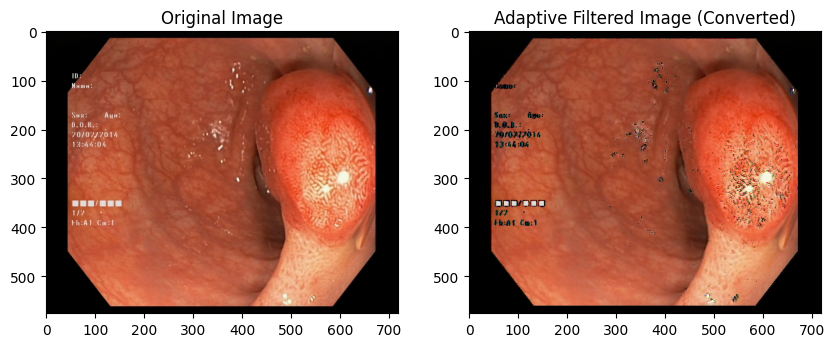

Filtered image saved as: filtered_image_color.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def adaptive_mean_filter_color(image, max_kernel_size):
    filtered_image = np.zeros_like(image)

    # Iterate over each channel
    for c in range(image.shape[2]):
        channel = image[:, :, c]

        # Apply adaptive mean filtering to the channel
        filtered_channel = adaptive_mean_filter(channel, max_kernel_size)

        # Assign the filtered channel to the filtered image
        filtered_image[:, :, c] = filtered_channel

    return filtered_image

def adaptive_mean_filter(image, max_kernel_size):
    filtered_image = np.zeros_like(image)

    # Iterate over each pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Define the initial kernel size
            kernel_size = 3

            # Iterate over increasing kernel sizes until a suitable one is found
            while kernel_size <= max_kernel_size:
                # Calculate the bounds of the neighborhood
                top = max(0, i - kernel_size // 2)
                bottom = min(image.shape[0], i + kernel_size // 2 + 1)
                left = max(0, j - kernel_size // 2)
                right = min(image.shape[1], j + kernel_size // 2 + 1)

                # Extract the neighborhood
                neighborhood = image[top:bottom, left:right]

                # Compute the mean of the neighborhood
                mean_value = np.mean(neighborhood)

                # Check if the pixel value is within a certain threshold of the mean
                if abs(image[i, j] - mean_value) <= 10:  # Adjust the threshold as needed
                    filtered_image[i, j] = mean_value
                    break  # Exit the loop if suitable kernel size is found

                # Increase the kernel size for the next iteration
                kernel_size += 2  # Increase by 2 to keep the kernel size odd (e.g., 3, 5, 7, ...)

    return filtered_image

# Load the input image
image = cv2.imread('/content/corrected_image.png')

# Apply the adaptive mean filter with a maximum kernel size
filtered_image = adaptive_mean_filter_color(image, max_kernel_size=15)  # Adjust max_kernel_size as needed

# Display the original and filtered images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title('Adaptive Filtered Image (Converted)')
plt.show()

# Save the filtered image
output_path = 'filtered_image_color.png'
cv2.imwrite(output_path, filtered_image)
print("Filtered image saved as:", output_path)


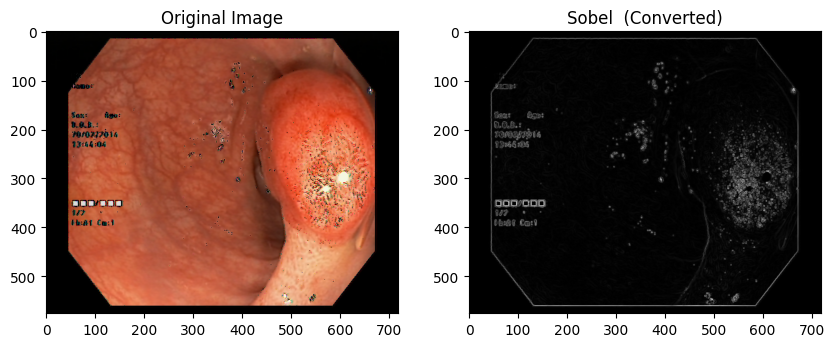

Filtered image saved as: gradient_magnitude_normalized.png


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/filtered_image_color.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel filter
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)

# Combine the Sobel X and Sobel Y images to get the final gradient magnitude image
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Normalize the gradient magnitude image to the range [0, 255]
gradient_magnitude_normalized = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)


# Display the original and filtered images
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(gradient_magnitude_normalized, cv2.COLOR_BGR2RGB))
plt.title('Sobel  (Converted)')
plt.show()

# Save the filtered image
output_path = 'gradient_magnitude_normalized.png'
cv2.imwrite(output_path, gradient_magnitude_normalized)
print("Filtered image saved as:", output_path)

In [ ]:
import cv2
import numpy as np

def calculate_psnr(original_img, processed_img):
    mse = np.mean((original_img - processed_img) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load the original image
original_image = cv2.imread('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg')

# Load the processed image (resultant input)
processed_image = cv2.imread('/content/corrected_image.png')

# Convert images to grayscale (if needed)
original_gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
processed_gray = cv2.cvtColor(processed_image, cv2.COLOR_BGR2GRAY)

# Calculate PSNR and MSE
psnr_value = calculate_psnr(original_gray, processed_gray)
mse_value = np.mean((original_gray - processed_gray) ** 2)

# Print results
print("PSNR:", psnr_value)
print("MSE:", mse_value)


PSNR: 49.44972011125056
MSE: 0.7380883487654321


PSNR: 42.06668358483058 dB
MSE: 4.040285011574074


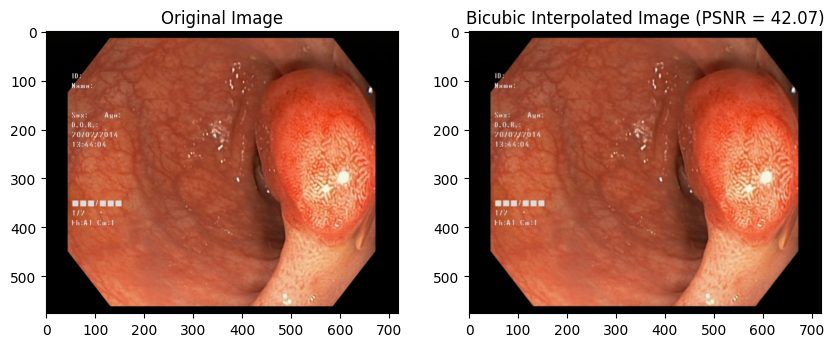

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def bicubic_interpolation(img, scale_factor):
    height, width = img.shape[:2]
    new_height = int(height * scale_factor)
    new_width = int(width * scale_factor)

    # Create empty image with new dimensions
    interpolated_img = np.zeros((new_height, new_width, img.shape[2]), dtype=np.uint8)

    # Compute the inverse scale factors
    x_scale = width / new_width
    y_scale = height / new_height

    # Iterate over each pixel in the new image
    for y in range(new_height):
        for x in range(new_width):
            # Map the new pixel back to the original image
            src_x = x * x_scale
            src_y = y * y_scale

            # Find the four nearest pixels in the original image
            x0 = int(src_x)
            x1 = min(x0 + 1, width - 1)
            y0 = int(src_y)
            y1 = min(y0 + 1, height - 1)

            # Compute the fractional part
            tx = src_x - x0
            ty = src_y - y0

            # Perform bicubic interpolation
            interpolated_img[y, x] = (
                (1 - tx) * (1 - ty) * img[y0, x0] +
                tx * (1 - ty) * img[y0, x1] +
                (1 - tx) * ty * img[y1, x0] +
                tx * ty * img[y1, x1]
            ).clip(0, 255)  # Clip values to [0, 255]

    return interpolated_img

def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr, mse

# Read an image
image = cv2.imread('/content/0a98bcca-3046-4d9f-adf7-301ef4897e7a.jpg')

# Scale factor for interpolation
scale_factor = 2

# Perform bicubic interpolation
interpolated_image = bicubic_interpolation(image, scale_factor)

# Resize the interpolated image to match the dimensions of the original image
resized_interpolated_image = cv2.resize(interpolated_image, (image.shape[1], image.shape[0]))

# Calculate PSNR and MSE
psnr, mse = calculate_psnr(image, resized_interpolated_image)
print("PSNR:", psnr, "dB")
print("MSE:", mse)

# Display the original and resized interpolated images
# Plotting
plt.figure(figsize=(10, 5))

# Plot original data points
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot resized interpolated values
plt.subplot(1, 2, 2)
plt.title(f'Bicubic Interpolated Image (PSNR = {psnr:.2f})')
plt.imshow(cv2.cvtColor(resized_interpolated_image, cv2.COLOR_BGR2RGB))

plt.show()
